In [8]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from pathlib import Path
from scipy import io

In [9]:
export_dir = Path('/Users/eliash/Desktop/multiomics/scatac_HSC_kitsubset/export')

In [12]:
peak_mat = io.mmread('/Users/eliash/Desktop/multiomics/scatac_HSC_kitsubset/export/peak_counts/counts.mtx')

In [5]:
peak_mat

<COOrdinate sparse matrix of dtype 'int64'
	with 167552599 stored elements and shape (199043, 11039)>

In [13]:
cells_csv_path = export_dir / 'peak_counts' / 'cells.csv'

cell_id = pd.read_csv(cells_csv_path,index_col = 0).iloc[:, 0]

In [14]:
peak_id_path = export_dir / 'peak_counts' / 'peaks.csv'
peak_id = pd.read_csv(peak_id_path,index_col = 0)

In [15]:
peak_id.index = peak_id['seqnames'] + ':' + peak_id['start'].astype(str) + '-' + peak_id['end'].astype(str)
peak_id.head()

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx,N
chr1:3670812-3671312,chr1,3670812,3671312,501,*,6.01746,0.325,0.174,2,HSC5._.young_1570,435,Xkr4,Exonic,435,uc007aeu.1,0.6986,1,0
chr1:3671372-3671872,chr1,3671372,3671872,501,*,4.01755,0.141,0.050,2,HSC3._.young_1570,123,Xkr4,Promoter,123,uc007aeu.1,0.7705,2,0
chr1:4173848-4174348,chr1,4173848,4174348,501,*,4.18357,0.211,0.082,2,HSC5._.young_1570,235142,Rp1,Distal,186215,uc007aex.2,0.3872,3,0
chr1:4351762-4352262,chr1,4351762,4352262,501,*,67.94120,0.786,0.750,4,HSC2._.old_1536,57228,Rp1,Exonic,8301,uc007aex.2,0.4032,4,0
chr1:4416666-4417166,chr1,4416666,4417166,501,*,6.01746,0.325,0.174,2,HSC5._.young_1570,7674,Rp1,Distal,7674,uc007aew.1,0.4371,5,0


In [16]:
adata_atac = sc.AnnData(peak_mat.T)

/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [17]:
adata_atac.obs_names = cell_id
adata_atac.var_names = peak_id.index
for col in peak_id.columns:
    adata_atac.var[col] = peak_id[col]

In [18]:
adata_atac

AnnData object with n_obs × n_vars = 11039 × 199043
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [19]:
cell_mdata_path = export_dir / 'cell_metadata.csv'
cell_mdata = pd.read_csv(cell_mdata_path,index_col = 0)

In [20]:
cell_mdata.head(5)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,...,predictedCell_Un,predictedGroup_Un,predictedScore_Un,predictedCell,predictedGroup,predictedScore,HSC_dEV,cell_cycle,subcluster,kit_time
old_1536#AAACCGCGTGAGAAAC-1,old_1536,18.126,714,2616,166,0.294197,1,1.035714,592,2184,...,GTTCATTTCTAAGGAG-1@HSC-1536_Old,HSC1,0.650307,GTTCATTTCTAAGGAG-1@HSC-1536_Old,HSC1,0.650307,69.153740,G1,High,2.053981
old_1536#AAACGGATCCTAAGGT-1,old_1536,17.061,6238,23037,1768,0.269030,1,1.281641,6385,18765,...,CGTAGCGGTTAGAGGG-1@HSC-1570_Old,HSC1,0.672121,CGTAGCGGTTAGAGGG-1@HSC-1570_Old,HSC1,0.672121,NaN,G1,Mid,1.822811
old_1536#AAAGCGGGTTCACTGT-1,old_1536,17.600,1191,4304,290,0.252790,1,1.228534,1197,3820,...,TGCTCACTCAAGTGTC-1@HSC-1536_Young,HSC1,0.477265,TGCTCACTCAAGTGTC-1@HSC-1536_Young,HSC1,0.477265,NaN,S,High,2.031918
old_1536#AAAGCTTGTAAAGCAA-1,old_1536,17.778,404,1516,91,0.279911,1,1.092736,367,1294,...,GTTCATTTCTAAGGAG-1@HSC-1536_Old,HSC1,0.728606,GTTCATTTCTAAGGAG-1@HSC-1536_Old,HSC1,0.728606,58.492048,G1,High,1.946954
old_1536#AAAGGACGTTCACTGT-1,old_1536,19.407,8595,30683,2670,0.269902,1,1.333662,8270,24357,...,CGTAGCGGTTAGAGGG-1@HSC-1570_Old,HSC1,0.709409,CGTAGCGGTTAGAGGG-1@HSC-1570_Old,HSC1,0.709409,NaN,G1,High,1.934173


In [21]:
for item in cell_mdata.columns:
    adata_atac.obs[item] = cell_mdata.loc[adata_atac.obs_names][item]

In [22]:
adata_atac

AnnData object with n_obs × n_vars = 11039 × 199043
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'DoubletScore', 'DoubletEnrichment', 'BlacklistRatio', 'seurat_clusters', 'ReadsInPeaks', 'FRIP', 'lowhigh', 'lowhigh1', 'age', 'HSC_subsets', 'agekit', 'barcodes', 'Clusters', 'ScranClusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell', 'predictedGroup', 'predictedScore', 'HSC_dEV', 'cell_cycle', 'subcluster', 'kit_time'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

## Add LSI Values

In [24]:
lsi = pd.read_csv(export_dir/'svd.csv', index_col = 0)

In [25]:
lsi.head(5)

,LSI1,LSI2,LSI4,LSI5,LSI6,LSI7,LSI8,LSI9,LSI10,LSI11,...,LSI21,LSI22,LSI23,LSI24,LSI25,LSI26,LSI27,LSI28,LSI29,LSI30
old_1536#AAACCGCGTGAGAAAC-1,-4.995870,0.223833,0.082474,0.013597,0.089504,0.014070,-0.264486,-0.359550,0.183260,0.424226,...,0.162401,-0.067929,-0.127351,-0.085701,0.480711,0.292990,0.122148,0.263676,0.502292,0.081713
old_1536#AAACGGATCCTAAGGT-1,-5.205659,-0.420088,-0.082977,0.577481,0.421077,0.088605,0.356312,-0.028678,0.299058,0.196128,...,0.230966,0.342382,-0.018522,0.271313,0.163631,0.080422,0.135191,0.047278,0.185463,0.160843
old_1536#AAAGCGGGTTCACTGT-1,-5.085514,0.246677,0.116669,0.240315,0.181846,-0.080532,-0.336077,0.401872,0.247930,0.317901,...,0.019160,0.136990,-0.415415,0.063743,-0.147539,-0.326119,0.599241,0.145893,0.504840,0.329308
old_1536#AAAGCTTGTAAAGCAA-1,-5.012311,-0.161244,-0.065169,0.153106,0.081091,0.039501,-0.302126,-0.160831,0.122283,0.034239,...,0.121539,-0.352540,0.200893,0.245755,0.258432,0.093150,0.271809,0.275540,0.183871,0.055335
old_1536#AAAGGACGTTCACTGT-1,-5.190209,-0.383770,-0.023264,0.640384,0.543474,0.264781,0.519485,-0.020327,0.236580,0.166138,...,0.261715,0.072835,0.153236,0.086249,0.159039,0.304663,0.271178,0.161093,0.055162,0.080472


In [26]:
adata_atac.obsm['X_lsi'] = lsi.values

## Add harmony Values

In [27]:
harmony = pd.read_csv(export_dir/'harmony.csv', index_col = 0)

In [28]:
adata_atac.obsm['X_harmony'] = harmony.values

## Add GeneScore results

In [30]:
gene_scores = pd.read_csv(export_dir/'gene_scores.csv',index_col = 0)

In [31]:
gene_scores.head(10)

,young_1536#TGGTGATTCGTACCGA-1,young_1536#GTTCATTTCGCTAAAC-1,young_1536#ACGACTTAGGTCCACA-1,young_1536#GGCTATGTCCCGTTTA-1,young_1536#TCAACAATCCTAGTAA-1,young_1536#TTCGGTACATAATGTC-1,young_1536#CGTTAAATCAGCATTA-1,young_1536#CTAACCTGTAACGGGA-1,young_1536#GAGTTACTCCTCATGC-1,young_1536#ATTAGCTCACAACCTA-1,...,old_1536#GCTGGTTCATGTTGTG-1,old_1536#GGATTCAGTTTGACCT-1,old_1536#TATAGCTCAGCACCAT-1,old_1536#ATCGGCCAGTGAGAGC-1,old_1536#CTTGGACCAATCCTAG-1,old_1536#CTCATTGTCAATCTCT-1,old_1536#AATCCTAAGTCCTTTG-1,old_1536#ACAAACTGTTTGTTGC-1,old_1536#CACAATATCGAAGCGG-1,old_1536#CATGGATTCAGGCTAT-1
Xkr4,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mrpl15,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lypla1,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tcea1,0.0,0.818,0.763,0.0,0.416,0.0,0.86,0.831,0.516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rgs20,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Atp6v1h,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oprk1,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Npbwr1,0.0,0.000,0.000,0.0,0.000,0.0,0.00,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
nz = np.where(np.sum(gene_scores, axis = 1) != 0)[0]
nz

array([    5,    10,    13, ..., 24308, 24309, 24320])

In [33]:
gene_scores_clean = gene_scores.iloc[nz, :]

In [34]:
adata_atac.obsm['Gene_Scores'] = gene_scores_clean.T.loc[adata_atac.obs_names, :].values
adata_atac.uns['Gene_Scores_key'] = gene_scores_clean.index.values

## Add Chromvar results

In [35]:
cvar = pd.read_csv(export_dir/'chromvar_motif_scores.csv',index_col = 0)

In [36]:
adata_atac.obsm['ChromVar'] = cvar.T.loc[adata_atac.obs_names, :].values
adata_atac.uns['ChromVar_key'] = cvar.index.values

In [37]:
adata_atac.var

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx,N
chr1:3670812-3671312,chr1,3670812,3671312,501,*,6.01746,0.325,0.174,2,HSC5._.young_1570,435,Xkr4,Exonic,435,uc007aeu.1,0.6986,1,0
chr1:3671372-3671872,chr1,3671372,3671872,501,*,4.01755,0.141,0.050,2,HSC3._.young_1570,123,Xkr4,Promoter,123,uc007aeu.1,0.7705,2,0
chr1:4173848-4174348,chr1,4173848,4174348,501,*,4.18357,0.211,0.082,2,HSC5._.young_1570,235142,Rp1,Distal,186215,uc007aex.2,0.3872,3,0
chr1:4351762-4352262,chr1,4351762,4352262,501,*,67.94120,0.786,0.750,4,HSC2._.old_1536,57228,Rp1,Exonic,8301,uc007aex.2,0.4032,4,0
chr1:4416666-4417166,chr1,4416666,4417166,501,*,6.01746,0.325,0.174,2,HSC5._.young_1570,7674,Rp1,Distal,7674,uc007aew.1,0.4371,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:169879332-169879832,chrX,169879332,169879832,501,*,38.33870,0.710,0.639,4,HSC4._.young_1570,99946,4933400A11Rik,Intronic,36,uc029xol.2,0.5110,3981,0
chrX:169880158-169880658,chrX,169880158,169880658,501,*,11.66110,0.442,0.351,2,HSC1._.young_1536,100772,4933400A11Rik,Intronic,788,uc029xol.2,0.4770,3982,0
chrX:169880778-169881278,chrX,169880778,169881278,501,*,32.65760,0.608,0.543,4,HSC1._.old_1536,101392,4933400A11Rik,Intronic,1408,uc029xol.2,0.4810,3983,0
chrX:169883810-169884310,chrX,169883810,169884310,501,*,21.34910,0.555,0.480,4,HSC2._.old_1536,104424,4933400A11Rik,Intronic,4440,uc029xol.2,0.3932,3984,0


# Add Gene Integration Score

In [49]:
gene_integration = pd.read_csv(export_dir/'gene_integration.csv',index_col = 0)

In [50]:
gene_integration.head(10)

,young_1536#AAACAGCCAATTGCGC-1,young_1536#AAACAGCCACCTCGCT-1,young_1536#AAACAGCCACGGTTTA-1,young_1536#AAACAGCCATGAATCT-1,young_1536#AAACATGCAATCGCAC-1,young_1536#AAACCAACAAGGTAAC-1,young_1536#AAACCAACAGTAGGTG-1,young_1536#AAACCGAAGACCATAC-1,young_1536#AAACCGAAGCACCACA-1,young_1536#AAACCGAAGGCAGGTG-1,...,old_1536#TTTGCGGAGTATTGGC-1,old_1536#TTTGCGGAGTGAGCGG-1,old_1536#TTTGGCTGTACTTAGG-1,old_1536#TTTGGCTGTTGAAGCC-1,old_1536#TTTGTCTAGGAACCAA-1,old_1536#TTTGTGAAGGTGTTAC-1,old_1536#TTTGTGGCACCTCAGG-1,old_1536#TTTGTGGCAGAGAGCC-1,old_1536#TTTGTGTTCCTCCTAA-1,old_1536#TTTGTGTTCTAATTGG-1
Xkr4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.796937,0.887417,0.741025,0.911032,0.905669,0.344100,0.517243,0.446533,0.518742,0.387242,...,0.286003,0.619009,0.391618,0.458398,0.534469,0.338986,0.561624,0.399207,0.457086,0.500573
Lypla1,0.177204,0.338848,0.480501,0.308517,0.068553,0.287623,0.443829,0.277102,0.281837,0.327171,...,0.685887,0.220073,0.600443,0.652055,0.242751,1.100632,0.246974,0.416745,0.551904,0.228797
Tcea1,1.602302,1.021609,1.976434,1.575340,1.756407,2.200574,1.639922,1.125492,1.377538,1.151373,...,1.812566,1.323431,2.428107,1.888448,1.478649,2.661849,1.464709,1.340764,1.897887,1.185907
Rgs20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Atp6v1h,1.243960,1.775732,1.212696,2.341283,1.164888,0.709112,0.685767,1.987865,0.797443,2.239246,...,0.757185,0.784245,0.618932,0.500367,0.813041,0.568018,0.748675,1.579369,0.607219,2.129756
Rb1cc1,3.715079,5.002123,2.435230,4.261259,4.105491,5.448848,5.932642,3.152508,5.876954,4.270613,...,5.397220,4.173442,5.790921,4.753948,4.099706,5.608164,4.371605,3.053099,5.128055,2.931832
Alkal1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
nz = np.where(np.sum(gene_integration, axis = 1) != 0)[0]
nz

array([    0,     3,     4, ..., 17275, 17276, 17277])

In [52]:
gene_integration_clean = gene_integration.iloc[nz, :]

In [53]:
adata_atac.obsm['Gene_Integration'] = gene_integration_clean.T.loc[adata_atac.obs_names, :].values
adata_atac.uns['Gene_Integration_key'] = gene_integration_clean.index.values

## For ArchR Chromvar Score Heatmap (Figures 3F and S10G) 

In [38]:
adata_Chromvar = sc.AnnData(X =adata_atac.obsm['ChromVar'],
                       obs= adata_atac.obs,
                       obsm= adata_atac.obsm,
                       var=pd.DataFrame(index=adata_atac.uns['ChromVar_key']))

In [39]:
var_names1 = ['Zbtb1_182','Zbtb7a_808', 'Runx1_712', 'Runx2_713', 'Runx3_858','Gata2_383', 'Gata3_384', 'Bcl11a_795', 'Bcl11b_814']

In [46]:
low_chromvar = adata_Chromvar[(adata_Chromvar.obs['agekit'] == 'young-Low')|(adata_Chromvar.obs['agekit'] == 'old-Low')]
lowhigh_chromvar = adata_Chromvar[(adata_Chromvar.obs['lowhigh'] == 'Low')|(adata_Chromvar.obs['lowhigh'] == 'High')]

/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df

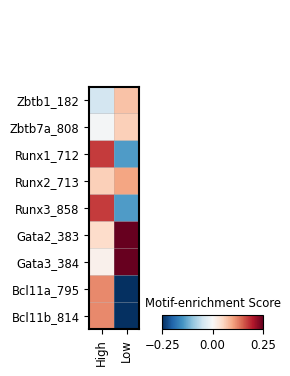

In [44]:
sc.pl.matrixplot(
 lowhigh_chromvar,
    var_names= ['Zbtb1_182','Zbtb7a_808', 'Runx1_712', 'Runx2_713', 'Runx3_858','Gata2_383', 'Gata3_384', 'Bcl11a_795', 'Bcl11b_814'], 
    groupby='lowhigh',
    colorbar_title="Motif-enrichment Score", cmap='RdBu_r',vmin=-0.25, vmax=0.25, 
    swap_axes=True) #save='DE_Chromvar_lowvshigh_TF_matrixplot.pdf'

/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df

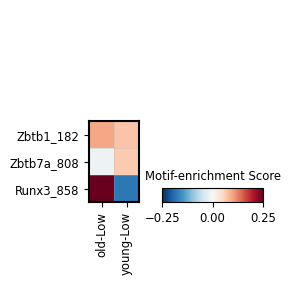

In [47]:
sc.pl.matrixplot(
 low_chromvar,
    var_names=['Zbtb1_182','Zbtb7a_808','Runx3_858'],
    groupby='agekit',
    colorbar_title="Motif-enrichment Score",cmap='RdBu_r',vmin=-0.25, vmax=0.25, 
    swap_axes=True) #save='Chromvar_low_oldvsyoung_matrixplot.pdf'

## For ArchR GeneIntegration Heatmap (Figure S10I)

In [55]:
adata_GeneIntegration = sc.AnnData(X =adata_atac.obsm['Gene_Integration'],
                       obs= adata_atac.obs,
                       obsm= adata_atac.obsm,
                       var=pd.DataFrame(index=adata_atac.uns['Gene_Integration_key']))

In [59]:
adata_GeneIntegration.layers["scaled"] = sc.pp.scale(adata_GeneIntegration, copy=True).X

In [61]:
adata_GeneIntegration.layers

Layers with keys: scaled

In [63]:
low = adata_GeneIntegration[(adata_GeneIntegration.obs['agekit'] == 'young-Low')|(adata_GeneIntegration.obs['agekit'] == 'old-Low')]

In [62]:
low.layers

Layers with keys: 

/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df

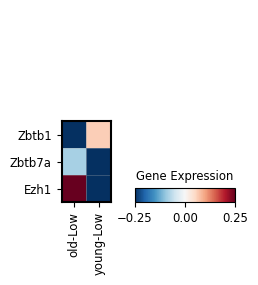

In [64]:
sc.pl.matrixplot(
 low,
    var_names= ['Zbtb1', 'Zbtb7a', 'Ezh1'],
    groupby='agekit',layer='scaled',vmin=-0.25, vmax=0.25,
   cmap= 'RdBu_r', 
    swap_axes=True,
    colorbar_title='Gene Expression')#save='GeneExpression_low_oldvsyoung_matrixplot.pdf')

## For ArchR GeneAccessibility Heatmaps (Figures 3C and S10H)

In [66]:
adata_GeneScore = sc.AnnData(X =adata_atac.obsm['Gene_Scores'],
                       obs= adata_atac.obs,
                       obsm= adata_atac.obsm,
                       var=pd.DataFrame(index=adata_atac.uns['Gene_Scores_key']))

In [67]:
adata_GeneScore.layers["scaled"] = sc.pp.scale(adata_GeneScore, copy=True).X

In [68]:
cluster_test3  = adata_GeneScore[(adata_GeneScore.obs['lowhigh'] == 'Low') | (adata_GeneScore.obs['lowhigh'] == 'High')]
low = adata_GeneScore[(adata_GeneScore.obs['agekit'] == 'young-Low')|(adata_GeneScore.obs['agekit'] == 'old-Low')]

In [69]:
var_names2 = ['Zbtb1', 'Zbtb7a', 'Ezh1','Ezh2', 'Runx1', 'Runx2', 'Runx3', 'Bcl11a']

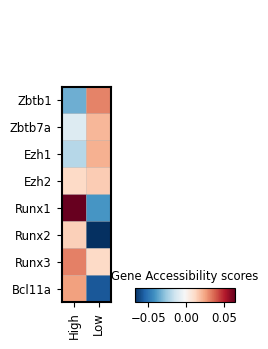

/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/anaconda3/envs/R-lisi/lib/python3.12/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df

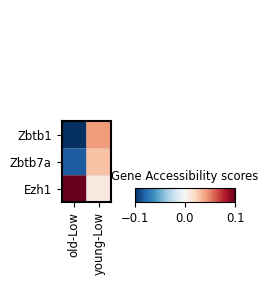

In [71]:
sc.pl.matrixplot(
 cluster_test3,
    var_names=var_names2,
    groupby='lowhigh', layer='scaled',
   cmap= 'RdBu_r', 
    swap_axes=True,
    colorbar_title='Gene Accessibility scores') #save='GeneAccessibilityScore_lowvshigh_matrixplot.pdf' )

sc.pl.matrixplot(
 low,
    var_names=['Zbtb1', 'Zbtb7a', 'Ezh1'],
    groupby='agekit',layer='scaled', vmin=-0.1, vmax=0.1,
   cmap= 'RdBu_r', 
    swap_axes=True,
    colorbar_title='Gene Accessibility scores') #save='GeneAccessibilityScore_low_oldvsyoung_matrixplot.pdf')